# Chapter 1 to 4

### Import Libraries 

In [3]:
from pandas import DataFrame, Series
import pandas as pd
import json

### Open json document

In [3]:
path = "C:\\Users\\mdeleseleuc\\Documents\\usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line.decode('utf-8')) for line in open(path, 'rb')]

### Note

Execute code = shit + enter

Table of contents = http://sebastianraschka.com/Articles/2014_ipython_internal_links.html

### Create a data frame

In [41]:
frame = DataFrame(records)
frame.info()
frame['tz'][:10] #from first row to 10th row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

### Counting Time Zone

In [42]:
tz_counts = frame['tz'].value_counts()

#### Count Top 10 Time Zone 

In [43]:
tz_counts[:10] # from first row to 10th row

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

## Select Multiple Columns 

In [9]:
from numpy.random import randn

df = DataFrame(randn(10, 10), index=range(0,10), columns=['A', 'B', 'C', 'D','E','F','G','H','I','J'])

cols = list(df.loc[:,'A':'C']) + ['E'] + list(df.loc[:,'G':'I']) # df.loc[rows, columns]
df[cols]


,A,B,C,E,G,H,I
0,1.677514,1.101738,1.117259,-0.514088,-1.319674,0.569941,0.978364
1,-0.714049,0.065767,-0.543893,-0.050964,-0.384654,1.188692,-0.439944
2,-0.683878,1.523127,-0.910985,-1.658524,0.840793,1.118768,-0.555175
3,0.668227,-0.490898,-0.050164,0.736620,0.218297,-0.271325,-2.931362
4,-0.511613,0.816408,1.248522,-0.076769,-0.279570,-0.057956,0.984328
5,-1.819857,0.623746,-0.153850,0.248986,-0.492459,1.153250,0.427736
6,-0.688883,-0.023200,0.742137,-0.209036,1.336395,0.948518,1.004062
7,-0.711535,-0.392498,0.729614,-0.810388,-1.025586,1.705238,-1.113016
8,-0.249632,1.732541,-0.612956,-0.689039,-0.223742,1.167056,2.150023
9,-0.307764,-0.248707,0.055805,-0.627051,0.594314,-0.276431,0.437257


In [10]:
cols = list(df.ix[:,:2] + df.ix[:,[4]])  #first two columns + 4th column
df[cols]

,A,B,E
0,1.677514,1.101738,-0.514088
1,-0.714049,0.065767,-0.050964
2,-0.683878,1.523127,-1.658524
3,0.668227,-0.490898,0.736620
4,-0.511613,0.816408,-0.076769
5,-1.819857,0.623746,0.248986
6,-0.688883,-0.023200,-0.209036
7,-0.711535,-0.392498,-0.810388
8,-0.249632,1.732541,-0.689039
9,-0.307764,-0.248707,-0.627051


#### Second method

In [8]:
df.filter(regex='[A-CEG-I]')

,A,B,C,E,G,H,I
0,0.384669,-0.330832,-0.574919,1.570310,-1.221755,1.179080,-0.194085
1,-1.277400,1.029275,-1.598296,0.397047,0.234475,1.054908,0.009161
2,0.949726,0.584491,-0.024352,0.201681,-0.555958,-0.675905,-1.574532
3,-0.840697,-0.131566,-0.739522,-1.960427,-0.938186,0.877210,0.692589
4,-0.269616,0.063256,1.308412,2.049237,-1.270625,-2.578670,2.675549
5,0.122485,-0.002204,0.305197,1.968836,0.178242,1.025513,-1.905688
6,0.266261,0.078134,0.633137,-0.930699,-1.685433,0.005600,-0.217683
7,1.508548,2.228639,-3.411782,0.627032,1.158981,-1.201295,-1.091338
8,2.138219,1.023272,0.002718,0.938779,0.339556,-0.452240,1.928843
9,1.273194,1.530215,-0.632540,1.128502,0.060703,-0.089748,1.147362


##### Alternative

In [9]:
df.filter(regex='[ABCEGHI]')

,A,B,C,E,G,H,I
0,0.384669,-0.330832,-0.574919,1.570310,-1.221755,1.179080,-0.194085
1,-1.277400,1.029275,-1.598296,0.397047,0.234475,1.054908,0.009161
2,0.949726,0.584491,-0.024352,0.201681,-0.555958,-0.675905,-1.574532
3,-0.840697,-0.131566,-0.739522,-1.960427,-0.938186,0.877210,0.692589
4,-0.269616,0.063256,1.308412,2.049237,-1.270625,-2.578670,2.675549
5,0.122485,-0.002204,0.305197,1.968836,0.178242,1.025513,-1.905688
6,0.266261,0.078134,0.633137,-0.930699,-1.685433,0.005600,-0.217683
7,1.508548,2.228639,-3.411782,0.627032,1.158981,-1.201295,-1.091338
8,2.138219,1.023272,0.002718,0.938779,0.339556,-0.452240,1.928843
9,1.273194,1.530215,-0.632540,1.128502,0.060703,-0.089748,1.147362


## Clean the data 

##### Fill NAs & Null Values

In [44]:
clean_tz = frame['tz'].fillna('Missing') # Replace NA with "Missing"
clean_tz[clean_tz == ''] = 'Unknown' # Then replace empty results with "Unknown" 
tz_count = clean_tz.value_counts()
tz_count[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

### Plot Tz Counts

'\nkind : str\n‘line’ : line plot (default)\n‘bar’ : vertical bar plot\n‘barh’ : horizontal bar plot\n‘hist’ : histogram\n‘box’ : boxplot\n‘kde’ : Kernel Density Estimation plot\n‘density’ : same as ‘kde’\n‘area’ : area plot\n‘pie’ : pie plot\n‘scatter’ : scatter plot\n‘hexbin’ : hexbin plot\n\nrot : int, default None\nRotation for ticks (xticks for vertical, yticks for horizontal plots)\n'

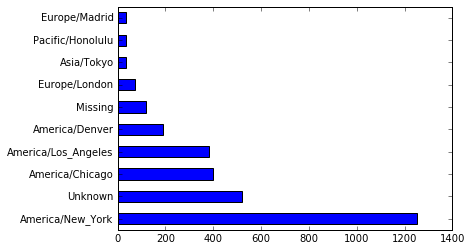

In [45]:
%matplotlib inline 
# Necessary to display the graphic in Jupyter Notebook

tz_count[:10].plot(kind = 'barh', rot = 0)

"""
kind : str
‘line’ : line plot (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’ : hexbin plot

rot : int, default None
Rotation for ticks (xticks for vertical, yticks for horizontal plots)
"""

### Parse a string 

In [12]:
frame["a"][:10] # Long string with too much information

# Note: frame["column name"]["Rows"] because I named the dataframe "frame" (yeah...)

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [13]:
results = Series([x.split()[0] for x in frame.a.dropna()])

# Series is a one-dimensional labeled array capable of holding any data type 
# (integers, strings, floating point numbers, Python objects, etc.)

In [14]:
# Why .split()[0]? Because want first substring 
# Details:

strg = frame["a"][:1] # first row
print ("Result 1:"), print(strg)
print('')

strg = strg[0] # content of the dataframe (to be able to pass a string in the function below)
print ("Result 2:"), print(strg.split())
print('')

print ("Result 3:"), print(strg.split()[0])


Result 1:
0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

Result 2:
['Mozilla/5.0', '(Windows', 'NT', '6.1;', 'WOW64)', 'AppleWebKit/535.11', '(KHTML,', 'like', 'Gecko)', 'Chrome/17.0.963.78', 'Safari/535.11']

Result 3:
Mozilla/5.0


(None, None)

In [15]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Decompose Top Time Zones by Windows vs. Non- Windows Users

In [24]:
import numpy as np

# Exclude missing agents ("agents" = column "a")
cframe = frame[frame.a.notnull()] 

# Si contient le mot "Windows" dans la colonne "a(gent)", attribut lui "Windows" comme OS
operating_system = np.where(cframe['a'].str.contains("Windows"), "Windows", "Not Windows") 

operating_system[:5]

AttributeError: 'DataFrame' object has no attribute 'a'

##### Group by tz and OS

In [17]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [18]:
agg_counts = by_tz_os.size().unstack().fillna(0) 

# Unstack = reshap the result into a table


In [19]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


##### Select the top overall time zones.

In [20]:
# Create index to sort the tz in ascending order

indexer = agg_counts.sum(1).argsort()

# .sum(1) = sum the rows:
# indexer = agg_counts.sum(1)
# indexer[:10]

In [21]:
indexer[:10] # indexes for the first 10 rows

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

##### Use *take* to select the rows in the index order

In [22]:
count_subset = agg_counts.take(indexer)[-10:] # slice off the last 10 rows

count_subset # results in ascending order (Not Windows + Windows)

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


##### Plot the result

In [23]:
%matplotlib inline 

count_subset.plot(kind = "barh", stacked = True)

count_subset.plot(kind = "barh", stacked = False)

NameError: name 'count_subset' is not defined

##### Calculate relative percentage by normalizing the rows 

In [24]:
# Percentage of each column in the row total: 
normed_subset = count_subset.div(count_subset.sum(1), axis = 0) #div() == Floating division of dataframe 

normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


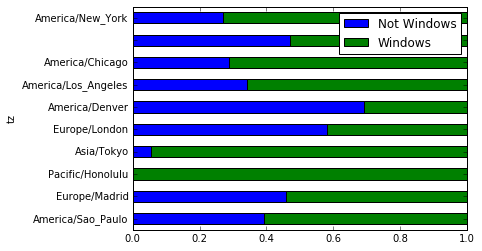

In [25]:
normed_subset.plot(kind = "barh", stacked = True)

## MovieLens 1M Data Set

##### Collection of movie ratings

In [22]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip'] # specify the names you want to give to the columns below

users = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\users.dat', sep = '::', header = None, 
                      names = unames, engine='python')

In [27]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\ratings.dat', sep = '::', header = None, 
                        names = rnames, engine='python')

In [28]:
mnames = ["movie_id", 'title', 'genres']

movies = pd.read_table('C:\\Users\\mdeleseleuc\\Documents\\ml-1m\\movies.dat', sep = '::', header = None, 
                        names = mnames, engine='python')

In [29]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [30]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [31]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#### Merge data into one table

In [32]:
data = pd.merge(pd.merge(ratings,users),movies) # merge ratings and users first then the result with movies
# panda infers which columns to use as the merge (or join) keys based on overlapping names

In [33]:
data[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


#### Mean movie ratings by gender

In [34]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc = 'mean') 

In [35]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


#### Filter down to movies that received at least x (250) ratings

In [36]:
ratings_by_title = data.groupby('title').size() # Equivalent of select title, count(*) from data group by title

In [37]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [38]:
# index of titles receiving at least 250 ratings

active_titles = ratings_by_title.index[ratings_by_title >= 250] 

In [39]:
active_titles[-1] # Get the last element of the list

# The some_list[-n] syntax gets the nth-to-last element

'eXistenZ (1999)'

In [40]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

##### Use index created above to select rows from mean_ratings

In [41]:
mean_ratings = mean_ratings.ix[active_titles]

In [42]:
mean_ratings[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


#### Top films among female viewers

In [43]:
top_female_rating = mean_ratings.sort_values(by = 'F', ascending = False) # Equivalent of Select ... order by F desc

In [44]:
top_female_rating [:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measuring rating disagreement

#### Find movies that are most divise between male and female 

In [45]:
# Create new column with rating diff between sex 

mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F'] 

In [47]:
# Sort by diff to get the movies with the greatest difference 

sorted_by_diff = mean_ratings.sort_values(by = 'diff') 

# ascending = False not used because we want the movies preferred by women i.e. results < 0 (M-F < 0 if F > M) 

In [50]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [53]:
# Movies preferred by men that women didn't rate as highly 

# Reverse orders of rows, take first 15 rows

sorted_by_diff[::-1][:15] # [::-1] reverse array 

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [56]:
# Alternative Method

sorted_by_diff_M = mean_ratings.sort_values(by = 'diff', ascending = False)

sorted_by_diff_M[:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


#### Movies with the most disagreement among viewers, independant of gender

In [57]:
# Disagreement = variance or standard deviation of the ratings

# SD of rating group by title

rating_std_by_title = data.groupby('title')['rating'].std()

In [58]:
rating_std_by_title[:15]

title
$1,000,000 Duck (1971)                 1.092563
'Night Mother (1986)                   1.118636
'Til There Was You (1997)              1.020159
'burbs, The (1989)                     1.107760
...And Justice for All (1979)          0.878110
1-900 (1994)                           0.707107
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
187 (1997)                             1.057919
2 Days in the Valley (1996)            0.921592
20 Dates (1998)                        1.151943
20,000 Leagues Under the Sea (1954)    0.869685
Name: rating, dtype: float64

In [66]:
# Filter down to active titles

rating_std_by_title.ix[active_titles][:15]

title
'burbs, The (1989)                     1.107760
10 Things I Hate About You (1999)      0.989815
101 Dalmatians (1961)                  0.982103
101 Dalmatians (1996)                  1.098717
12 Angry Men (1957)                    0.812731
13th Warrior, The (1999)               1.140421
2 Days in the Valley (1996)            0.921592
20,000 Leagues Under the Sea (1954)    0.869685
2001: A Space Odyssey (1968)           1.042504
2010 (1984)                            0.946618
28 Days (2000)                         0.920278
39 Steps, The (1935)                   0.853501
54 (1998)                              1.035481
7th Voyage of Sinbad, The (1958)       0.931531
8MM (1999)                             1.113432
Name: rating, dtype: float64

In [124]:
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [69]:
# Order Series by value in descending order

rating_std_by_title.sort_values(ascending = False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Exercices perso

In [74]:
# Count of movies per genre

data['genres'].value_counts()[:10]

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: genres, dtype: int64

In [94]:
# Average rating by genre

data.pivot_table('rating', index='genres', aggfunc = 'mean')[:10]

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Action|Adventure|Comedy                          3.095330
Name: rating, dtype: float64

In [99]:
# Standard deviation of rating by genre

group_by_genres = data.groupby(by = ['genres'])['rating'].std()

group_by_genres[:10].sort_values(ascending = False)

genres
Action|Adventure                                 1.171912
Action|Adventure|Children's|Comedy               1.111044
Action|Adventure|Animation|Children's|Fantasy    1.106791
Action|Adventure|Children's|Fantasy              1.074399
Action|Adventure|Animation|Horror|Sci-Fi         1.073581
Action|Adventure|Comedy                          1.066915
Action                                           1.052655
Action|Adventure|Children's|Sci-Fi               1.044111
Action|Adventure|Animation                       0.948470
Action|Adventure|Children's                      0.638775
Name: rating, dtype: float64

In [151]:
# Standard deviation of rating by genre and gender

group_by_genres = data.groupby(by = ['genres', 'gender'])['rating'].std()

group_by_genres[:10].sort_values(ascending = False)

genres                                         gender
Action|Adventure|Animation|Horror|Sci-Fi       F         1.226633
Action|Adventure                               M         1.175769
                                               F         1.155230
Action|Adventure|Animation                     F         1.115813
Action                                         F         1.080733
Action|Adventure|Animation|Children's|Fantasy  M         1.075081
                                               F         1.062096
Action|Adventure|Animation|Horror|Sci-Fi       M         1.052273
Action                                         M         1.048401
Action|Adventure|Animation                     M         0.893944
Name: rating, dtype: float64

In [153]:
group_by_genres[0]

1.0807334804058146

In [157]:
# Type

group_by_genres.__class__.__name__

'Series'

In [184]:
# Filtering result by gender

 # http://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe

df = group_by_genres.reset_index() # Transform group_by_genres into workable dataframe

df[df['gender'] == 'F'].head()

,genres,gender,rating
0,Action,F,1.080733
2,Action|Adventure,F,1.155230
4,Action|Adventure|Animation,F,1.115813
6,Action|Adventure|Animation|Children's|Fantasy,F,1.062096
8,Action|Adventure|Animation|Horror|Sci-Fi,F,1.226633


In [185]:
# A look at the new data frame

df.head(5)

,genres,gender,rating
0,Action,F,1.080733
1,Action,M,1.048401
2,Action|Adventure,F,1.155230
3,Action|Adventure,M,1.175769
4,Action|Adventure|Animation,F,1.115813


### US Baby Names 1880-2010

In [ ]:
# Data about frequency of baby names from 1880 through the present

# Data: https://www.ssa.gov/oact/babynames/limits.html

# Path: C:\Users\mdeleseleuc\Documents\Babynames\names

In [4]:
# Read all the files 

 # Source: http://stackoverflow.com/questions/36617464/pandas-add-a-new-column-identifier-when-reading-multiple-files

import glob

path = r'C:\Users\mdeleseleuc\Documents\Babynames\names'
allFiles = glob.glob(path + '/*.txt')

list_ = []
column_names = ['Name','Sex', 'Count']
Year = 1880

for i, file_ in enumerate(allFiles):
    data = pd.read_csv(file_, sep = ',', header = None, names = column_names)
    data['Year'] = Year + i  
    list_.append(data)

In [5]:
# Concat the results from the different documents

final_data = pd.concat(list_, ignore_index=True)

In [6]:
# Type?

final_data.__class__.__name__

'DataFrame'

In [7]:
# Range of years (do I have them all?)

min_date = final_data.Year.min()
max_date = final_data.Year.max()

print("The first date is \x1b[31m\"%s\"\x1b[0m and last date is \x1b[31m\"%s\"\x1b[0m" % (min_date, max_date))

The first date is "1880" and last date is "2015"


#### Instructions

- Vizualise the proportion of babies give a particular name over time (e.g.: your own)
- Determine the relative rank of a name
- Determine the most popular nams in each year or the names with largest increases or decreases
- Analyze trends in names vowels, consonances, lenght, overall diversity, changes in spelling, first and last letters
- Analyze external sources of trends: biblical names, celebrities, demographic changes

##### 1.0 Vizualize: Personal exercices

In [13]:
# Look at one year

names1880 = final_data[final_data['Year'] == 1880]

In [14]:
# Let's take a look at my name for a given year

names1880[names1880['Name'] == 'Mary']

# Seems like both male and female can be named Mary

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1273,Mary,M,27,1880


In [19]:
# Sort result by year

final_data[final_data['Name'] == 'Mary'].sort_values(by = 'Year').head(15)

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1273,Mary,M,27,1880
2000,Mary,F,6919,1881
3238,Mary,M,29,1881
3935,Mary,F,8148,1882
5276,Mary,M,30,1882
6062,Mary,F,8012,1883
7407,Mary,M,32,1883
8146,Mary,F,9217,1884
9610,Mary,M,36,1884


In [9]:
# Separate females and males 

mary_female = final_data[(final_data['Name'] == 'Mary') & (final_data['Sex'] == 'F')]

mary_male = final_data[(final_data['Name'] == 'Mary') & (final_data['Sex'] == 'M')]

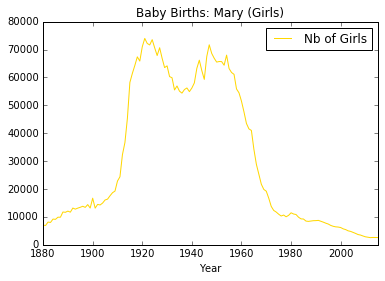

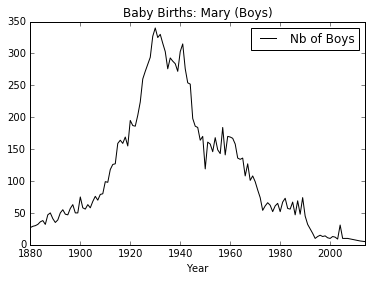

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt

# Plot the evolution for each sex

mary_female.plot('Year', 'Count', label = 'Nb of Girls', color = 'gold')
plt.title('Baby Births: Mary (Girls)')

mary_male.plot('Year', 'Count', label = 'Nb of Boys', color = 'black')
plt.title('Baby Births: Mary (Boys)')

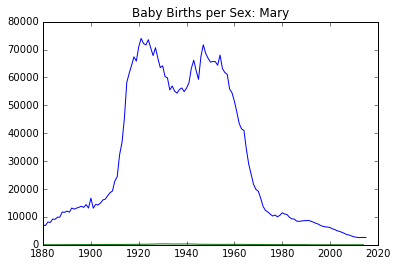

In [22]:
# Both lines on same graphic

plt.plot(mary_female['Year'], mary_female['Count']) 
plt.plot(mary_male['Year'], mary_male['Count'])
plt.title('Baby Births per Sex: Mary')
plt.show()

#### 1.1 Book's solution

In [15]:
# Rename "Count"
names1880 = names1880.rename(columns={'Count': 'births'})

# Total number of births 
names1880.groupby('Sex')['births'].sum()

Sex
F     90992
M    110490
Name: births, dtype: int64

In [16]:
# Assemble all the data into a single DataFrame and add a year field

years = range(1880,2011)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = r'C:\Users\mdeleseleuc\Documents\Babynames\names\yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

In [17]:
# Concatenate everything into a single DataFrame

names = pd.concat(pieces, ignore_index = True) # Not interest in preserving the original row numbers returned from read_csv

In [18]:
names.tail(15)

,name,sex,births,year
1691740,Ziven,M,5,2010
1691741,Zmari,M,5,2010
1691742,Zoran,M,5,2010
1691743,Zoren,M,5,2010
1691744,Zuhaib,M,5,2010
1691745,Zyeire,M,5,2010
1691746,Zygmunt,M,5,2010
1691747,Zykerion,M,5,2010
1691748,Zylar,M,5,2010
1691749,Zylin,M,5,2010


In [27]:
total_births = names.pivot_table('births', index = 'year', columns = 'sex', aggfunc = sum) # index = rows

total_births.tail()

sex,F,M
year,,
2006,1898776,2052652
2007,1919775,2072505
2008,1887660,2036750
2009,1833461,1979895
2010,1773440,1914629


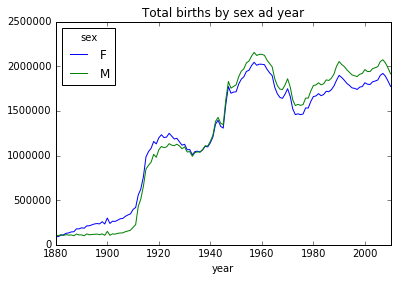

In [28]:
total_births.plot(title = 'Total births by sex ad year')

Let's insert a column "prop" with the fraction of babies given each name relative to the total number of births.

In [19]:
# Note: remember that births is already an aggregation

def add_prop(group):
    # Integer division floors
    births = group.births.astype(float) # necessary for python version < python 3 when wants to divide
    group['prop'] = births/births.sum()
    return group

# Proportion of a name per sex and year

names= names.groupby(['year', 'sex']).apply(add_prop) 

# apply applique le calcul à chaque ligne, qui correspondent chacune à un nom i.e. pas besoin de groupby('name')

In [20]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


Sanity check: prop column sums to 1 within each category? 

since float, use np.allclose to check that the group sums are sufficiently close to (but perhaps not exactly equal to) 1

In [27]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

Top 1000 names for each sex/year combination

In [26]:
import numpy as np

def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000] # sort by number of births and take the first 1K results

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [28]:
# We will use this data set in the following investigations

top1000[(top1000.sex == 'M') & (top1000.year == 1880)].head(20)

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9531,1880,0.086261
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
947,Frank,M,3242,1880,0.029342
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022120
951,Robert,M,2415,1880,0.021857


### Analyzing Naming Trend

Spliting the top 1000 names into the boy & girl portions

In [29]:
boys = top1000[top1000['sex'] == 'M'] # ou top1000[top1000.sex == 'F']

girls = top1000[top1000['sex'] == 'F'] # ou top1000[top1000.sex == 'M']

Total number of birth per year and name

In [30]:
total_births = top1000.pivot_table('births', index = 'year' , columns = 'name', aggfunc = sum)

Plot a handful names

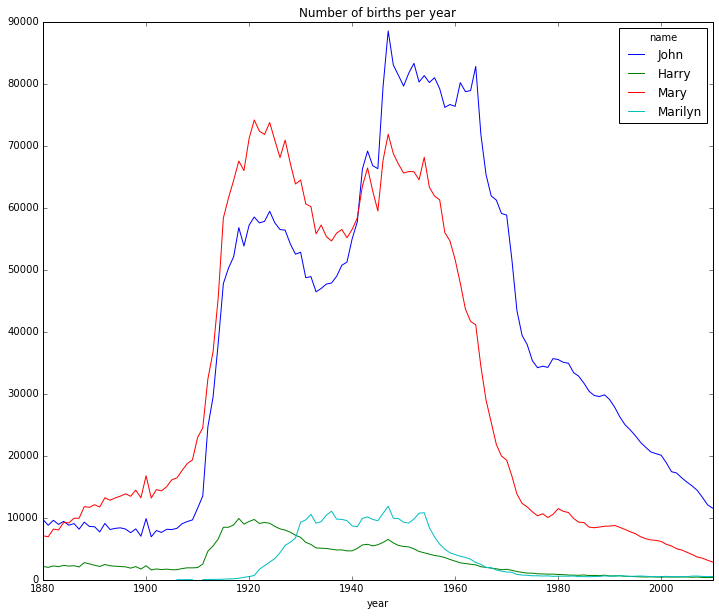

In [31]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']] # Select specific columns

# Everyone on the same graph

subset.plot(subplots = False, figsize = (12,10), grid = False, title = 'Number of births per year')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000003444BB00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002CA3A6A0>], dtype=object)

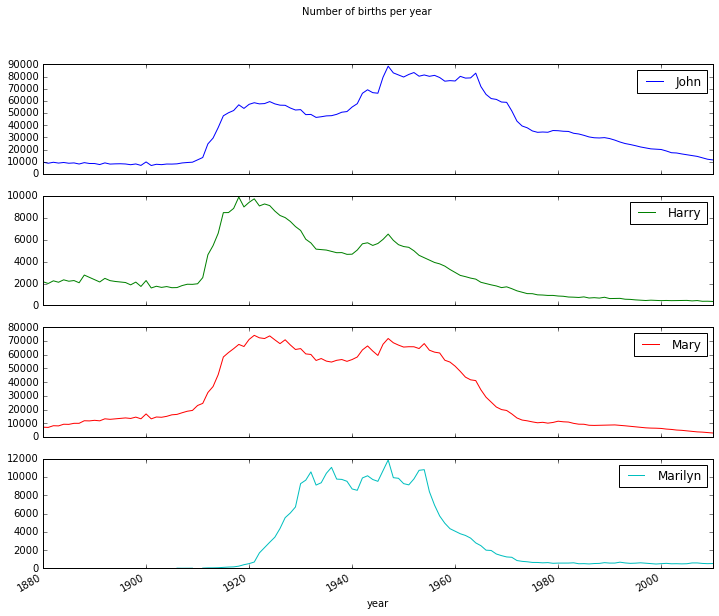

In [109]:
# Everyone on its specific graph

subset.plot(subplots = True, figsize = (12,10), grid = False, title = 'Number of births per year')

In [110]:
# Note: to select multiple columns in a dataframe: 

top1000[['name', 'year']].head(5) 

,name,year
0,Mary,1880
1,Anna,1880
2,Emma,1880
3,Elizabeth,1880
4,Minnie,1880


Note: Difference between groupby and pivot_table is essentially the way the results are presented:

http://stackoverflow.com/questions/34702815/pandas-group-by-and-pivot-table-difference 

Personal note: but can use groupby.unstack() if understood well

### Measuring the increase in naming diversity

The decreases observed on the graphics above could be explained by fewer parents choosing common names. Is this hypothisis making sense?

In [32]:
# Proportion of births represented by the top 1000 most popular names (aggregated by year and sex)

table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)

# prop was calculated on the overall data set, not the top1000 subset 
# i.e. sum of proportion = % of top 1000 names in total names of a year and sex

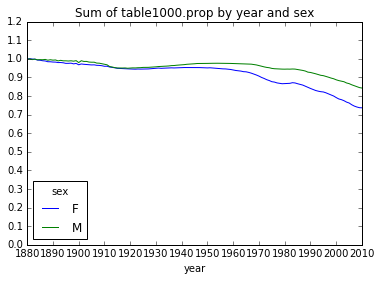

In [33]:
# From 0 to 1.2 on the Y-axis + 13 samples generated
# From 1880 to 2020 with a graduation of 10 

table.plot(title = 'Sum of table1000.prop by year and sex',
          yticks = np.linspace(0,1.2,13), xticks = range(1880, 2020,10)) 

We do observe an increasing name diversity (decreasing total proportion of the total proportion in the top 1000) 

Another interesting metric: nb of distinct names, from highest to lowest, in top 50% of births.

In [34]:
# Taking the cumulative sum

df = boys[boys['year'] == 2010]

prop_cumsum = df.sort_values(by ='prop', ascending = False)['prop'].cumsum() 

prop_cumsum[:10]

260877    0.011540
260878    0.020938
260879    0.029986
260880    0.038947
260881    0.047845
260882    0.056592
260883    0.065177
260884    0.073439
260885    0.081545
260886    0.089628
Name: prop, dtype: float64

In [35]:
# Calling searchsorted: returns the position in the cumsum at which 0.5 would need to be inserted to keep it in sorted order
# i.e. where 0.5 belongs if you want it to fit in the sorted array 

prop_cumsum.values.searchsorted(0.5)

116

arrays are zero-indexed i.e. need to add 1 to this result.
Index = 117

In [36]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [119]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


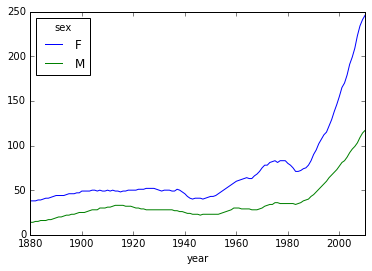

In [120]:
diversity.plot(title = 'Number of popular names in the top 50%') # Evolution of the median over time

Girl names have always been more diverse than boy names and have only become more so over time. 

### Exercice perso: extract last letter in columns 'name'

In [37]:
Names = names['name']
Names[0][-1:len(Names)]

'y'

In [38]:
Names.index

RangeIndex(start=0, stop=1691755, step=1)

In [39]:
result = []

for index in Names.index:
    Last_letter = Names[index][-1:len(Names)]
    result.append(Last_letter)

# print(result)

names['Last_letter'] = result

In [40]:
names.head()

,name,sex,births,year,prop,Last_letter
0,Mary,F,7065,1880,0.077644,y
1,Anna,F,2604,1880,0.028618,a
2,Emma,F,2003,1880,0.022013,a
3,Elizabeth,F,1939,1880,0.021310,h
4,Minnie,F,1746,1880,0.019189,e


In [41]:
Last_letter_count = names.groupby(['year', 'Last_letter','sex']).size()

In [42]:
Last_letter_count.head()

year  Last_letter  sex
1880  a            F      419
                   M       31
      b            M        7
      c            M        7
      d            F        8
dtype: int64

In [43]:
Last_letter_count = names.pivot_table('name', index = 'year', columns = ('Last_letter', 'sex'), aggfunc = 'count')

Last_letter_count.head()

Last_letter      a         b          c          d            e        ...   \
sex              F     M   F     M    F    M     F     M      F      M ...    
year                                                                   ...    
1880         419.0  31.0 NaN   7.0  NaN  7.0   8.0  85.0  325.0  165.0 ...    
1881         405.0  27.0 NaN   6.0  NaN  8.0   9.0  76.0  336.0  148.0 ...    
1882         450.0  28.0 NaN   7.0  1.0  7.0   8.0  88.0  355.0  183.0 ...    
1883         451.0  29.0 NaN   5.0  1.0  7.0  11.0  85.0  379.0  163.0 ...    
1884         511.0  32.0 NaN  10.0  NaN  7.0  11.0  90.0  409.0  175.0 ...    

Last_letter   v         w         x          y           z       
sex           F    M    F    M    F    M     F      M    F    M  
year                                                             
1880        NaN  1.0  NaN  7.0  NaN  4.0  47.0  101.0  1.0  3.0  
1881        NaN  1.0  1.0  6.0  NaN  5.0  47.0   95.0  1.0  1.0  
1882        NaN  1.0  NaN  8.0  NaN  5.0  57.0  110.0  1.0  3.0  
1883        NaN  1.0  NaN  9.0  1.0  5.0  54.0   97.0  1.0  1.0  
1884        NaN  1.0  NaN  7.0  NaN  4.0  66.0  113.0  1.0  3.0  

[5 rows x 52 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DAF4F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019C93BA8>], dtype=object)

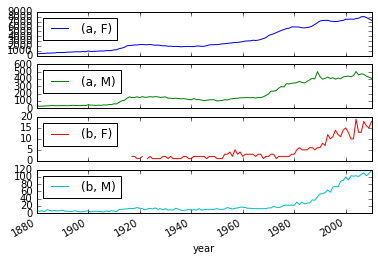

In [44]:
subset = Last_letter_count[['a','b']]

subset.plot(subplots = True)

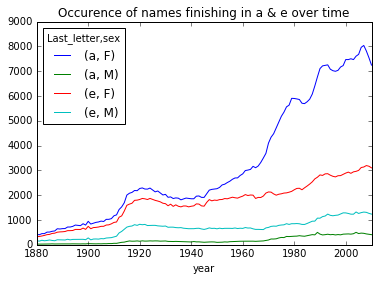

In [45]:
subset = Last_letter_count[['a', 'e']]


subset.plot(title = 'Occurence of names finishing in a & e over time')

In [47]:
# to learn about a variable, use ? before or after it

subset?

In [49]:
# Check the excution time of a statement with %timeit

%timeit names.pivot_table('name', index = 'year', columns = ('Last_letter', 'sex'), aggfunc = 'count')

1 loop, best of 3: 436 ms per loop


## Chapter 4 - NumPy Basics: Arrays and Vectorized Computation

### Creating ndarrays

Easiest way is to use the array function

In [51]:
data1 = [6,7.5,8,0,1]

arr1 = np.array(data1)

arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [52]:
# Shape of the array

arr1.shape

(5,)

In [53]:
# Type of the data in the array

arr1.dtype

dtype('float64')

Nested sequence will be converted into multi-dimensional array

In [55]:
data2 = [[1,2,3,4],[5,6,7,8]]

arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [56]:
arr2.shape

(2, 4)

zeros and ones create arrays of 0's or 1's with a given length or shape.
empty creates an array without initializing its values to any particular value.

In [57]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [58]:
# Pass a tuple to create a higher dimensional array

np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [64]:
# np.empty won't necessary retun an array of all zeros. It can also return 

np.empty((2,3,2))

array([[[  1.01670548e-316,   5.35920516e-317],
        [  5.35970318e-317,   4.75644902e-317],
        [  5.42737041e-317,   0.00000000e+000]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]]])

In [65]:
# NumPy arange() = Python built-in function range() but return ndarry instead of a list

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Data Types for ndarrays

dtype: special object containing the information the ndarray needs to interpret a chunk of memory as a particular type of data

In [80]:
arr1 = np.array([1,2,3], dtype = np.float64) #the number after "float" = number of bits per element

arr2 = np.array([1,2,3], dtype = np.int32)

arr1_type = arr1.dtype 
arr2_type = arr2.dtype

print('The first array is of type %s and the second of type %s' % (arr1_type, arr2_type))

The first array is of type float64 and the second of type int32


Can cast an array from one dtype to another using the astype method

In [81]:
arr = np.array([1,2,3,4,5])

arr.dtype

dtype('int32')

In [82]:
float_arr = arr.astype(np.float64)

float_arr.dtype

dtype('float64')

Can use another array's dtype attribute

In [91]:
int_array = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50], dtype = np.float64) # array of floats 

int_array.astype(calibers.dtype) # cast int_array as float 

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

### Operation between Array and Scalars

#### Basic Indexing and Slicing

In [94]:
arr = np.arange(10)

arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
# Select 5th element

arr[5]

5

In [96]:
# Select elements 5 to 8 (index begins at 0)

arr[5:8]

array([5, 6, 7])

In [97]:
# Replace elements 5 to 8 by the same value 

arr[5:8] = 12

arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [99]:
# Unlike for a list, if assign a scalar value to a slice, the value is propagated to the entire selection
# Array slices are views on the original array. The data is not copied and any modification to the view will be reflected
# in the souce array

arr_slice = arr[5:8]

arr_slice[1] = 1234

arr

array([   0,    1,    2,    3,    4,   12, 1234,   12,    8,    9])

In [100]:
# If want a copy of a slice of an ndaray instead of a view, use .copy()

arr[5:8].copy

<function ndarray.copy>

In [102]:
# Multidimensinal arrays

arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

arr2d[2]

array([7, 8, 9])

In [103]:
# Select the element of third column and 1st row 

   0 1 2
   - - -
0 |1 2 3|
1 |4 5 6|
2 |7 8 9|
   - - -
    
arr2d[0][2]

3

In [104]:
# Alternative 

arr2d[0,2]

3

#### Indexing with slices

In [106]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [107]:
# Slice along axis 0 (i.e. the first axis)

arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [108]:
# Multiple slices

arr2d[:2, 1:] # select 2 first axis and in each, 2 last elements

array([[2, 3],
       [5, 6]])

In [116]:
# Mixing integer indexes and slices

arr2d[0,:2] # get a lower dimensional slice with 2 first elements of first axis

array([1, 2])

In [117]:
# first element of third axis 

arr2d[2,:1] 

array([7])

In [118]:
# First element of all axis

arr2d[:,:1]

array([[1],
       [4],
       [7]])

### Boolean Indexing

In [120]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

data = np.random.randn(7,4) 

In [121]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [122]:
data

array([[-0.26551662, -1.73545918, -0.65628384, -0.13014516],
       [ 0.96041673,  0.6418384 ,  0.55584276, -1.652561  ],
       [ 1.04767131, -0.52754797, -1.04528457, -0.6884013 ],
       [ 0.12884067,  0.90595401, -0.62467084, -1.53981903],
       [-0.00425391, -2.02231964,  0.07618018,  0.31763027],
       [-3.7669363 ,  0.7891647 ,  0.39423854, -0.33855452],
       [-0.3088646 ,  2.28514893, -1.62565187,  0.6371738 ]])

In [123]:
# Using a boolean to index an array 

names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [124]:
# Suppose the names each correspond to a row in the data array and want to select all the rows with corresponding name "Bob"

data[names == 'Bob']

array([[-0.26551662, -1.73545918, -0.65628384, -0.13014516],
       [ 0.12884067,  0.90595401, -0.62467084, -1.53981903]])

In [125]:
# Can mix boolean arrays with slices or integer

data[names == 'Bob', :2] # 

array([[-0.26551662, -1.73545918],
       [ 0.12884067,  0.90595401]])

In [126]:
# Select everything except 'Bob'

# either
data[names != 'Bob']

array([[ 0.96041673,  0.6418384 ,  0.55584276, -1.652561  ],
       [ 1.04767131, -0.52754797, -1.04528457, -0.6884013 ],
       [-0.00425391, -2.02231964,  0.07618018,  0.31763027],
       [-3.7669363 ,  0.7891647 ,  0.39423854, -0.33855452],
       [-0.3088646 ,  2.28514893, -1.62565187,  0.6371738 ]])

In [128]:
# or
data[~(names == 'Bob') ] 

array([[ 0.96041673,  0.6418384 ,  0.55584276, -1.652561  ],
       [ 1.04767131, -0.52754797, -1.04528457, -0.6884013 ],
       [-0.00425391, -2.02231964,  0.07618018,  0.31763027],
       [-3.7669363 ,  0.7891647 ,  0.39423854, -0.33855452],
       [-0.3088646 ,  2.28514893, -1.62565187,  0.6371738 ]])

In [129]:
# & (and) and | (or)

mask = (names == 'Bob')|(names == 'Will')

mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [130]:
data[mask]

array([[-0.26551662, -1.73545918, -0.65628384, -0.13014516],
       [ 1.04767131, -0.52754797, -1.04528457, -0.6884013 ],
       [ 0.12884067,  0.90595401, -0.62467084, -1.53981903],
       [-0.00425391, -2.02231964,  0.07618018,  0.31763027]])

In [131]:
# Find all the negative values in data

data[data <0]

array([-0.26551662, -1.73545918, -0.65628384, -0.13014516, -1.652561  ,
       -0.52754797, -1.04528457, -0.6884013 , -0.62467084, -1.53981903,
       -0.00425391, -2.02231964, -3.7669363 , -0.33855452, -0.3088646 ,
       -1.62565187])

In [134]:
# replace them with a value of 0

data[data <0] = 0

data

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.96041673,  0.6418384 ,  0.55584276,  0.        ],
       [ 1.04767131,  0.        ,  0.        ,  0.        ],
       [ 0.12884067,  0.90595401,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.07618018,  0.31763027],
       [ 0.        ,  0.7891647 ,  0.39423854,  0.        ],
       [ 0.        ,  2.28514893,  0.        ,  0.6371738 ]])

In [135]:
data[names != 'Joe'] = 7

data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.96041673,  0.6418384 ,  0.55584276,  0.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.7891647 ,  0.39423854,  0.        ],
       [ 0.        ,  2.28514893,  0.        ,  0.6371738 ]])

### Fancy Indexing

Fancy indexing is a term used to describe indexing using integer arrays

In [137]:
# Create an ndarray

arr = np.empty((8,4))

for i in range(8):
    arr[i] = i
    
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [138]:
# Select subset of the rows in a particular order, pass a list or ndarray of integers specifying the desired order

arr[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [139]:
# Using negative indices select rows from the end

arr[[-3,-5,-7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [140]:
# Passing multiple index arrays, selects a 1D array of elements corresponding to each tuple of indice

arr = np.arange(32).reshape((8,4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [141]:
# 2nd row & first element (i.e.(1,0)), 6th row & 4th element (i.e.(5,3)) ... 

arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

In [143]:
# Different from selecting a subset of the matrix's rows and columns

arr[[1,5,7,2]][:,[0,3,1,2]] # axis 1,5,7,2 & columns 0,3,1,2 (all elements of) 

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [144]:
# Alternative: 

arr[np.ix_([1,5,7,2],[0,3,1,2])] # Index of element in array and index of element inside each element in array

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Data Processing Using Arrays

Practice of replacing explicit loops with array expressions is commonly referred to as vectorization. 

### Expressiong Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if condition else y.

In [151]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

cond = np.array([True, False, True, True, False])

Take value from xarr whenever the corresponding value in cond is true otherwise take the value from yarr

Note: .zip()

This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.

- x = [1, 2, 3]
- y = [4, 5, 6]
- zipped = zip(x, y)

zipped:
[(1, 4), (2, 5), (3, 6)]

In [148]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

Multiple problems: 

1. Not very fast for large arrays
2. Will not work for multipledimensional arrays

With np.where() can write this very concisely:

In [153]:
result = np.where(cond, xarr, yarr) # where condition met then xarr else yarr

result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

### Methods for Boolean Arrays

Boolean values are coerced to 1 and 0 in the above methods. Thus, sum is often used as a means of counting True values in a boolean array:  

In [157]:
arr = np.random.randn(100)

In [158]:
(arr >0).sum()

48

Two other methods:

- Any: test whether one or more values in an array is True
- All: test whether every value is True

In [159]:
arr.any()

True

In [160]:
arr.all()

True

### Sorting

Numpy arrays can be sorted in-place using the sort method:

In [164]:
arr = np.random.randn(8)

arr

array([ 0.07798455,  0.63952235, -0.20037398, -0.85628265, -0.65023849,
       -0.46668263, -0.4265109 , -2.10046215])

In [165]:
arr.sort()

arr

array([-2.10046215, -0.85628265, -0.65023849, -0.46668263, -0.4265109 ,
       -0.20037398,  0.07798455,  0.63952235])

Multidimensional arrays can have each ID section of values sorted in-place along an axis by passing the axis number to sort

In [168]:
arr = np.random.randn(5,3)

arr

array([[ 1.24197753,  0.51018738, -2.07476614],
       [-0.47986629,  0.91800921, -0.27175463],
       [ 0.20921859, -0.68403815, -0.7811702 ],
       [-0.76588892,  0.85046744, -1.47903103],
       [-0.97588769,  0.06936166, -2.40860901]])

In [169]:
arr.sort(1) # sort by row (last arr)

arr

array([[-2.07476614,  0.51018738,  1.24197753],
       [-0.47986629, -0.27175463,  0.91800921],
       [-0.7811702 , -0.68403815,  0.20921859],
       [-1.47903103, -0.76588892,  0.85046744],
       [-2.40860901, -0.97588769,  0.06936166]])

In [171]:
arr.sort(0) # sort by column (last arr)

arr

array([[-2.40860901, -0.97588769,  0.06936166],
       [-2.07476614, -0.76588892,  0.20921859],
       [-1.47903103, -0.68403815,  0.85046744],
       [-0.7811702 , -0.27175463,  0.91800921],
       [-0.47986629,  0.51018738,  1.24197753]])

Way to compute the quantiles of an array is to sort it and select the value of a particular rank:

In [173]:
large_arr = np.random.randn(1000)

In [174]:
large_arr.sort()

large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5767246818790979

### Unique and Other Set Logic

np.unique(x) returns the sorted unique values in a array

In [175]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [176]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [177]:
ints = np.array([3,3,3,2,2,1,1,4,4])

In [178]:
np.unique(ints)

array([1, 2, 3, 4])

Pure python alternative:

In [180]:
sorted(set(names))

['Bob', 'Joe', 'Will']

np.in1d(x,y) tests membership of the values in one array in another, returning a boolean array:

In [183]:
values = np.array([6,0,0,3,2,5,6])

In [184]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

### Random Number Generation

Can get a x by x array of samples from the standard normal distribution using normal:

In [185]:
samples = np.random.normal(size = (4,4))

In [186]:
samples

array([[-0.10728159, -0.22351423, -0.80616386, -0.39633885],
       [ 1.09818277, -1.60985776, -0.01888531, -0.29002702],
       [-0.9823493 , -0.95895819, -0.84297108, -0.90420604],
       [ 1.50425958, -2.15239666, -0.82449335, -1.15633771]])